# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
response_btc = requests.get(btc_url).json()
btc_price = response_btc['data']['1']['quotes']['USD']['price']
print(f"The current BTC price is {btc_price}")
# Fetch current ETH price
# YOUR CODE HERE!
response_eth = requests.get(eth_url).json()
eth_price = response_eth['data']['1027']['quotes']['USD']['price']
print(f"The current BTC price is {eth_price}")

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current BTC price is 27756.0
The current BTC price is 1877.31
The current value of your 1.2 BTC is $33307.20
The current value of your 5.3 ETH is $9949.74


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp('2023-04-14', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
portfolio_df = alpaca.get_bars(tickers, timeframe, start=today, end=today).df
portfolio_df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG=portfolio_df[portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY=portfolio_df[portfolio_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
portfolio_df = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
# YOUR CODE HERE!
portfolio_df

AGG                                           \
                            open   high    low close   volume trade_count   
timestamp                                                                   
2023-04-14 04:00:00+00:00  99.56  99.59  99.32  99.4  4503010       19909   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-04-14 04:00:00+00:00  99.405533  412.81  415.09  410.06  412.46   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-04-14 04:00:00+00:00  75973321      573427  412.263399

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = portfolio_df.iloc[0]['AGG']['close']
spy_close_price = portfolio_df.iloc[0]['SPY']['close']
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.4
Current SPY closing price: $412.46


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20623.00
The current value of your 200 AGG shares is $19880.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame({'amount': [total_crypto, total_shares]}, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,43256.943
shares,40503.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

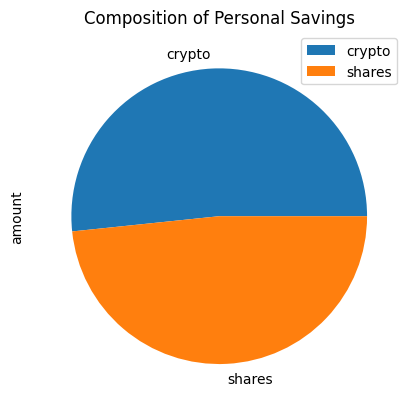

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings.loc['crypto']['amount'] + df_savings.loc['shares']['amount']
print(f"Total savings is ${total_savings}. Emergency fund is ${emergency_fund}.")
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in the savings.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${emergency_fund-total_savings} away from your financial goal.")

Total savings is $83759.943. Emergency fund is $36000.
Congratulations! You have enough money in the savings.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-04-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-04-14', tz='America/New_York').isoformat()
#start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
#end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_ticker = alpaca.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                      \
                             open      high     low   close    volume   
timestamp                                                               
2018-04-16 04:00:00+00:00  106.64  106.8400  106.61  106.82   3860890   
2018-04-17 04:00:00+00:00  106.81  106.8899  106.75  106.85   2362997   
2018-04-18 04:00:00+00:00  106.74  106.7510  106.54  106.55   2231676   
2018-04-19 04:00:00+00:00  106.34  106.3899  106.24  106.29  10985057   
2018-04-20 04:00:00+00:00  106.15  106.2400  106.00  106.00   2766030   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2018-04-16 04:00:00+00:00       13789  106.777580  267.00  268.20  266.07   
2018-04-17 04:00:00+00:00        9268  106.843189  269.33  270.87  268.75   
2018-04-18 04:00:00+00:00        9647  106.639143  270.69  271.30  269.87   
2018-04-19 04:00:00+00:00       20047  106.302239  269.65  269.88  267.72   
2018-04-20 04:00:00+00:00       11007  106.117094  268.81  269.06  265.61   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-04-16 04:00:00+00:00  267.37   63625287      251422  267.298482  
2018-04-17 04:00:00+00:00  270.13   64886136      253683  269.795896  
2018-04-18 04:00:00+00:00  270.37   58608057      197540  270.674441  
2018-04-19 04:00:00+00:00  268.87   77712909      284593  268.787580  
2018-04-20 04:00:00+00:00  266.66  100513533      292033  267.286647

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30years = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.4, 0.6],
    num_simulation=500,
    num_trading_days=30*252
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30years.portfolio_data.head()

AGG                                      \
                             open      high     low   close    volume   
timestamp                                                               
2018-04-16 04:00:00+00:00  106.64  106.8400  106.61  106.82   3860890   
2018-04-17 04:00:00+00:00  106.81  106.8899  106.75  106.85   2362997   
2018-04-18 04:00:00+00:00  106.74  106.7510  106.54  106.55   2231676   
2018-04-19 04:00:00+00:00  106.34  106.3899  106.24  106.29  10985057   
2018-04-20 04:00:00+00:00  106.15  106.2400  106.00  106.00   2766030   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-04-16 04:00:00+00:00       13789  106.777580          NaN  267.00   
2018-04-17 04:00:00+00:00        9268  106.843189     0.000281  269.33   
2018-04-18 04:00:00+00:00        9647  106.639143    -0.002808  270.69   
2018-04-19 04:00:00+00:00       20047  106.302239    -0.002440  269.65   
2018-04-20 04:00:00+00:00       11007  106.117094    -0.002728  268.81   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2018-04-16 04:00:00+00:00  268.20  266.07  267.37   63625287      251422   
2018-04-17 04:00:00+00:00  270.87  268.75  270.13   64886136      253683   
2018-04-18 04:00:00+00:00  271.30  269.87  270.37   58608057      197540   
2018-04-19 04:00:00+00:00  269.88  267.72  268.87   77712909      284593   
2018-04-20 04:00:00+00:00  269.06  265.61  266.66  100513533      292033   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-04-16 04:00:00+00:00  267.298482          NaN  
2018-04-17 04:00:00+00:00  269.795896     0.010323  
2018-04-18 04:00:00+00:00  270.674441     0.000888  
2018-04-19 04:00:00+00:00  268.787580    -0.005548  
2018-04-20 04:00:00+00:00  267.286647    -0.008220

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tjyang/git/Financial-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002139,1.001159,0.996472,0.999671,0.997554,1.009279,1.014041,0.995203,0.989308,0.978987,...,1.017502,1.001426,0.988208,0.985622,0.992638,0.992101,1.006141,0.988778,0.998292,1.000844
2,1.000727,1.008498,0.987617,0.981966,0.991744,1.012851,1.014822,1.000453,0.992596,0.979838,...,1.035931,1.005540,0.983786,0.994391,0.996517,0.988788,1.015242,0.991262,0.999739,1.016694
3,1.003716,1.006558,0.988664,0.977517,0.994254,1.016636,1.022139,0.987919,0.994460,0.989951,...,1.038349,1.004844,0.974733,0.995621,0.993583,0.990373,1.023872,0.993766,1.004544,1.020607
4,0.985315,1.006168,0.994160,0.984588,0.997348,1.013262,1.009476,0.993850,0.990371,0.992187,...,1.042174,1.010062,0.976675,0.997494,0.998919,0.980303,1.015093,0.990331,1.009044,1.030307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.685412,10.250489,2.746658,1.893331,6.084179,2.221020,2.282751,1.331715,2.998545,1.509787,...,10.004200,6.333167,1.306713,1.168082,9.666349,4.302034,8.917485,11.832099,7.704817,13.047191
7557,1.701254,10.394557,2.724482,1.892666,6.162208,2.212994,2.298748,1.342441,2.999572,1.494119,...,9.976375,6.426098,1.312916,1.161898,9.744717,4.295411,8.924827,11.914386,7.664520,13.166291
7558,1.668393,10.590012,2.677574,1.898668,6.133035,2.230795,2.299310,1.347476,2.990881,1.485218,...,10.020400,6.328712,1.310939,1.162496,9.753777,4.356549,8.952544,11.965070,7.722943,13.162499
7559,1.674751,10.507868,2.704177,1.907294,6.169175,2.228744,2.290457,1.347308,2.960852,1.476960,...,9.999063,6.503768,1.300338,1.149664,9.790531,4.365414,9.067718,12.085678,7.733378,13.167071


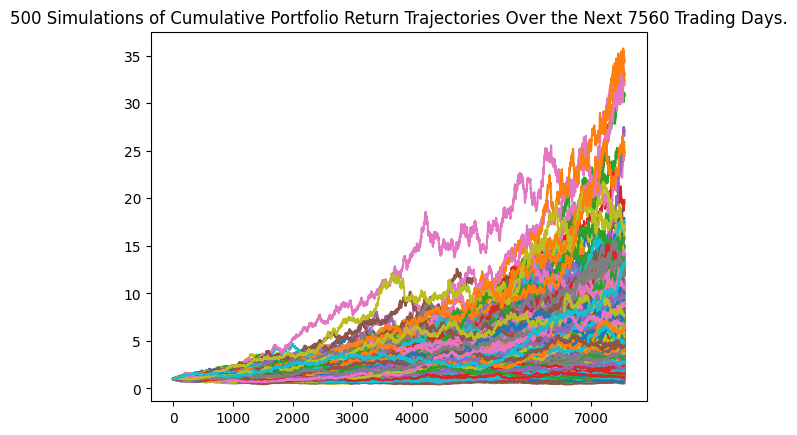

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
fig = MC_30years.plot_simulation().figure
fig.savefig('mc_30yrs_simulation.png', bbox_inches='tight')

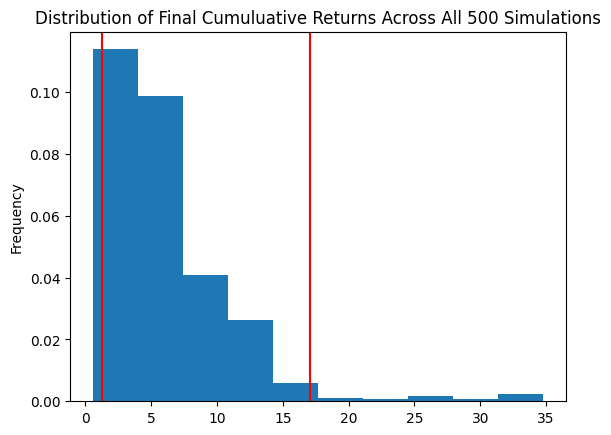

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
fig = MC_30years.plot_distribution().figure
fig.savefig('mc_30yrs_distribution.png', bbox_inches='tight')

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_30years.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              6.103082
std               4.835921
min               0.543408
25%               2.937486
50%               4.677754
75%               7.725916
max              34.802280
95% CI Lower      1.224041
95% CI Upper     17.042104
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = initial_investment * tbl[8]
ci_upper = initial_investment * tbl[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.0f} and ${ci_upper:.0f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $24481 and $340842


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower_30k = initial_investment * tbl[8]
ci_upper_30k = initial_investment * tbl[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30k:.0f} and ${ci_upper_30k:.0f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $36721 and $511263


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5years = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.4, 0.6],
    num_simulation=500,
    num_trading_days=5*252
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tjyang/git/Financial-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998400,1.003073,0.991557,0.988542,0.998434,1.007095,0.998228,0.995471,0.997164,0.989997,...,0.998388,0.994451,0.985223,0.999661,0.987175,1.003105,0.976833,0.993932,1.002755,1.015521
2,1.007815,1.003997,0.985353,0.991043,1.024620,1.016454,0.997760,0.993549,1.000368,0.993734,...,0.988996,0.998755,0.978543,0.997088,0.982948,1.005955,0.980036,0.995472,0.992155,1.023521
3,0.996624,1.008304,0.989949,0.999419,1.021970,1.010798,0.992121,0.990264,1.009199,1.011950,...,0.993181,0.992314,0.982241,0.999557,0.980409,1.011434,0.988253,0.996107,0.987174,1.023675
4,0.993326,1.007694,0.981442,0.999781,1.022764,1.002765,0.992155,0.989936,1.018845,1.014286,...,0.997250,0.985431,0.977647,1.009313,0.980537,1.009377,0.997584,0.993635,0.978260,1.042381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.902242,1.213185,1.387158,1.488200,1.627474,0.970171,1.449000,1.188584,1.498291,1.491880,...,1.405905,1.667270,0.935768,2.341883,1.225208,1.628462,1.217529,1.086904,1.141036,1.312108
1257,0.901505,1.204149,1.392445,1.482637,1.608460,0.971223,1.466143,1.199071,1.491089,1.486286,...,1.418337,1.674056,0.942452,2.318694,1.221609,1.614514,1.213729,1.083450,1.139413,1.297706
1258,0.905496,1.214502,1.407994,1.483368,1.583831,0.979359,1.483239,1.173066,1.489464,1.499959,...,1.416579,1.665314,0.943001,2.339074,1.228619,1.615713,1.209732,1.092906,1.144567,1.323376
1259,0.903571,1.212695,1.421240,1.474716,1.597667,0.970185,1.490096,1.168629,1.491874,1.509726,...,1.402497,1.653137,0.924854,2.316074,1.244545,1.647292,1.200631,1.107581,1.136806,1.324016


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

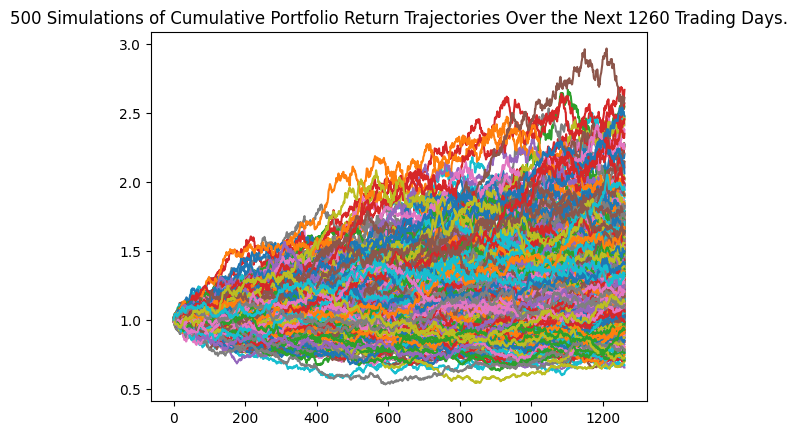

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_5years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

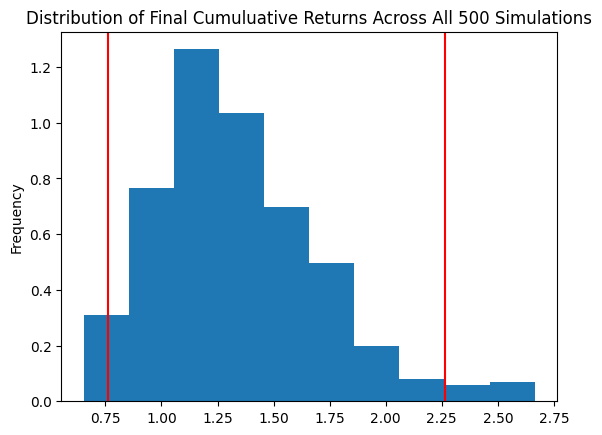

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_5years.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_5years = MC_5years.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_5years)

count           500.000000
mean              1.343736
std               0.369499
min               0.653758
25%               1.088667
50%               1.284186
75%               1.556309
max               2.664561
95% CI Lower      0.759833
95% CI Upper      2.264480
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = initial_investment * tbl_5years[8]
ci_upper_five = initial_investment * tbl_5years[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:.0f} and ${ci_upper_five:.0f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $45590 and $135869


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10years = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.4, 0.6],
    num_simulation=500,
    num_trading_days=10*252
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tjyang/git/Financial-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009678,0.994626,1.002348,1.002737,0.995614,1.003754,1.003700,0.998687,0.995805,0.989095,...,1.001586,1.005133,0.999269,0.992110,1.012407,0.988167,0.998461,0.994910,0.988025,0.995818
2,1.002005,0.993292,1.007273,1.023603,0.989112,1.003148,1.005702,1.008679,0.997119,0.999270,...,0.995892,1.026180,0.976122,0.992620,1.019950,0.991075,1.010715,0.993051,0.985978,0.992202
3,0.993328,0.997570,1.012175,1.032903,0.984243,1.006946,1.007067,1.006836,0.981080,0.999585,...,1.006374,1.009674,0.980019,0.991747,1.023096,0.986885,1.015140,0.991447,1.001925,0.982736
4,0.998936,0.991236,1.008990,1.025164,0.992502,1.015010,1.009451,1.017053,0.978247,0.990287,...,0.994243,1.002734,0.996799,0.990087,1.019433,0.982057,1.014311,0.981729,0.999723,0.995357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.580271,1.199047,1.320944,2.519838,2.575241,0.983494,1.184466,1.047265,1.967270,1.459661,...,1.303585,1.574547,1.573587,1.134730,2.507822,1.847548,1.550103,1.318329,1.289518,1.668941
2517,1.564126,1.201374,1.324401,2.492602,2.594410,0.988807,1.183732,1.038511,1.981585,1.455250,...,1.305980,1.548365,1.569234,1.123828,2.565725,1.846881,1.539967,1.320533,1.269740,1.654366
2518,1.576084,1.204456,1.331688,2.504056,2.604085,0.991956,1.179440,1.045373,1.995677,1.462575,...,1.289689,1.545661,1.568946,1.128864,2.597026,1.845307,1.538074,1.326714,1.281050,1.648680
2519,1.562964,1.202527,1.336582,2.471623,2.629333,0.980643,1.189269,1.040163,2.000541,1.464942,...,1.282226,1.562279,1.572413,1.135493,2.609951,1.867910,1.548104,1.297452,1.300646,1.644142


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

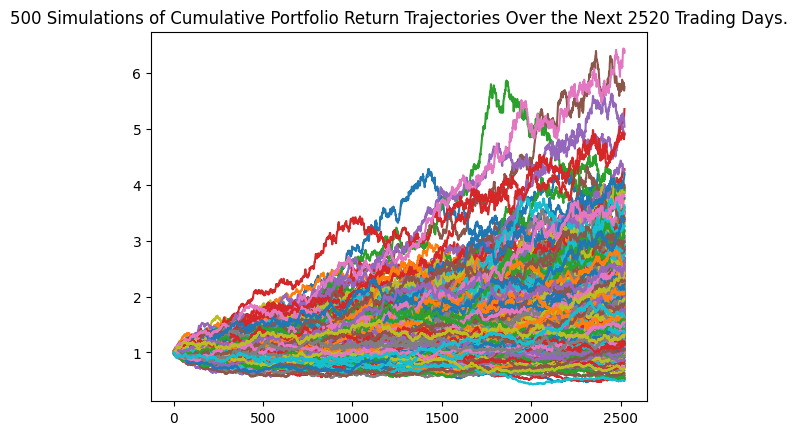

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_10years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

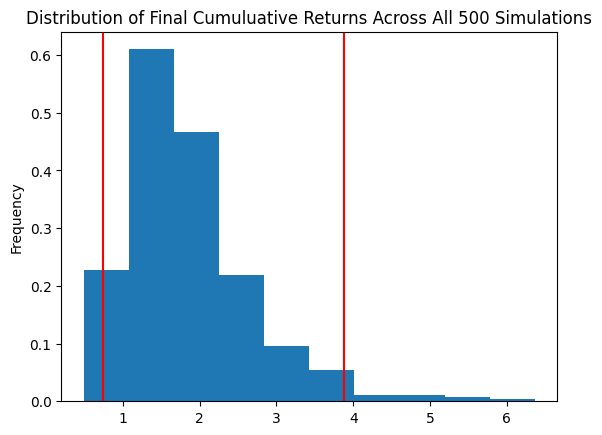

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_10years.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_10years = MC_10years.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_10years)

count           500.000000
mean              1.836773
std               0.825556
min               0.491934
25%               1.279971
50%               1.672536
75%               2.175350
max               6.362607
95% CI Lower      0.741069
95% CI Upper      3.874310
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = initial_investment * tbl_10years[8]
ci_upper_ten = initial_investment * tbl_10years[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:.0f} and ${ci_upper_ten:.0f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $44464 and $232459


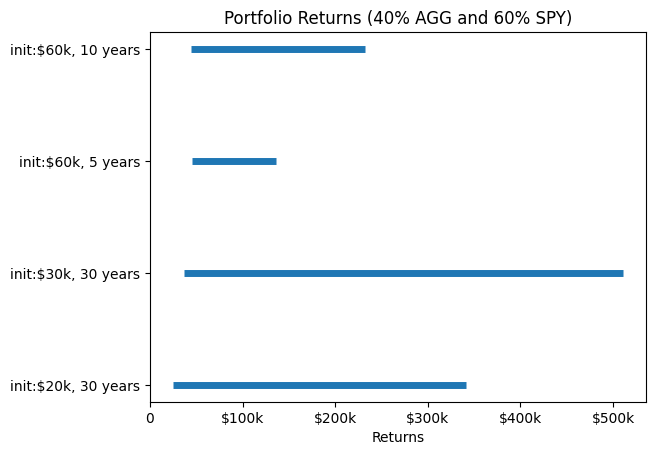

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hlines(y = 1, xmin = ci_lower, xmax = ci_upper, linewidth=5)
ax.hlines(y = 2, xmin = ci_lower_30k, xmax = ci_upper_30k, linewidth=5)
ax.hlines(y = 3, xmin = ci_lower_five, xmax = ci_upper_five, linewidth=5)
ax.hlines(y = 4, xmin = ci_lower_ten, xmax = ci_upper_ten, linewidth=5)
ax.set_yticks([1,2,3,4])
ax.set_yticklabels(['init:$20k, 30 years','init:$30k, 30 years', 'init:$60k, 5 years','init:$60k, 10 years'])
ax.set_xticks([0,100000,200000,300000,400000,500000])
ax.set_xticklabels(['0', '$100k', '$200k', '$300k', '$400k', '$500k'])
plt.title('Portfolio Returns (40% AGG and 60% SPY)')
plt.xlabel('Returns')
plt.savefig('returns.png', bbox_inches='tight')